# Project Proposal

For this assignment, I plan to use one of two API's.

The first API is called "Hyrule-Compendium-API", and it has information about every item and enemy type in the game Legend of Zelda Breath of the Wild. I plan to make a parent class called "Items", and then children classes for "Food", "Ingredients", "Weapons". The parent class will likely have variables like game_id, and a function to return an in game image, or a location that they can be found, both of which is information that should be available in the API. The children could have information about special effects, price, weapon and durability stats, etc. 

However, when reading through the documenation of this API, there was a notice that this API might have been recently made unavailable. However, there was also a recommendation for for using a newer version of the API, but I haven't been successful in accessing it. 

The below is a link to the API.
https://github.com/gadhagod/Hyrule-Compendium-API


####


####


The second API is an API that stores various information for the game Monster Hunter World. I plan to use the information about the weapon types, making a parent class Weapon that stores broad information about attack power or weapon tier or special effects, then a child class for every weapon type. Depending on the weapon type, they could store more information, like Bows, which could store information about what damage types they're compatible with, or for Swords, how much sharpness they have by default, etc.

Below is the link for the API's documentation.
https://mhw-db.com/

In [1]:
#from API_key import api_key
import requests
import pandas as pd

from matplotlib import pyplot as plt

import statistics

In [2]:
from Items import Items
from Weapons import Weapons
from Materials import Materials
from Food import Food

In [3]:
# will open API and scope out some info

url="https://botw-compendium.herokuapp.com/api/v3/compendium/all"

response = requests.get(url)

# print(response.status_code)
# response code 200, all is well

# this doesn't work because the "all is too big"
# print(response.json)

data = response.json()


if "data" in data:
    all_df=pd.DataFrame.from_dict(data["data"])
else:
    print("error in getting data")

# all_df
# IT WORKS

In [4]:
# will make dataframes for equipment, food, and materials

equip_df=all_df[all_df["category"]=="equipment"]
food_df=all_df[all_df["category"]=="materials"]
materials_df=all_df[all_df["edible"]==True]


# time to turn damage and defense, that are normally stored in properties column, into their own column


damage_list = []
defense_list = []

for i in range(equip_df.shape[0]):
    damage_list.append(equip_df["properties"].iloc[i].get("attack"))
    defense_list.append(equip_df["properties"].iloc[i].get("defense"))
    
equip_df = equip_df.drop(labels="properties", axis=1)
equip_df=equip_df.assign(damage=damage_list)
equip_df=equip_df.assign(defense=defense_list)

In [5]:
equip_df.head()

,category,common_locations,description,dlc,drops,edible,id,image,name,cooking_effect,hearts_recovered,damage,defense
83,equipment,None,The legendary sword that seals the darkness. I...,False,NaN,NaN,201,https://botw-compendium.herokuapp.com/api/v3/c...,master sword,NaN,NaN,30.0,0.0
84,equipment,"[Hyrule Field, West Necluda]",Wooden branches such as this are pretty common...,False,NaN,NaN,202,https://botw-compendium.herokuapp.com/api/v3/c...,tree branch,NaN,NaN,2.0,0.0
85,equipment,"[Great Hyrule Forest, Hyrule Field]","This torch will stay lit once ignited, but if ...",False,NaN,NaN,203,https://botw-compendium.herokuapp.com/api/v3/c...,torch,NaN,NaN,2.0,0.0
86,equipment,"[Hyrule Field, Tabantha Frontier]",A kitchen implement often used for serving del...,False,NaN,NaN,204,https://botw-compendium.herokuapp.com/api/v3/c...,soup ladle,NaN,NaN,4.0,0.0
87,equipment,"[West Necluda, Faron Grasslands]",This throwing weapon was originally used by th...,False,NaN,NaN,205,https://botw-compendium.herokuapp.com/api/v3/c...,boomerang,NaN,NaN,8.0,0.0


In [6]:
food_df.head()

,category,common_locations,description,dlc,drops,edible,id,image,name,cooking_effect,hearts_recovered,properties
268,materials,"[Hyrule Field, East Necluda]",A common fruit found on trees all around Hyrul...,False,NaN,NaN,165,https://botw-compendium.herokuapp.com/api/v3/c...,apple,,0.5,NaN
269,materials,"[East Necluda, Gerudo Desert]",Fruit from palm trees that grow near the ocean...,False,NaN,NaN,166,https://botw-compendium.herokuapp.com/api/v3/c...,palm fruit,,1.0,NaN
270,materials,"[Gerudo Highlands, Hebra Mountains]","A fruit that grows in cold, snowy regions know...",False,NaN,NaN,167,https://botw-compendium.herokuapp.com/api/v3/c...,wildberry,,0.5,NaN
271,materials,"[West Necluda, Faron Grasslands]",This fruit's mighty odor has earned it the nic...,False,NaN,NaN,168,https://botw-compendium.herokuapp.com/api/v3/c...,hearty durian,extra hearts,3.0,NaN
272,materials,"[Gerudo Desert, Faron Grasslands]",This resilient fruit can flourish even in the ...,False,NaN,NaN,169,https://botw-compendium.herokuapp.com/api/v3/c...,hydromelon,heat resistance,0.5,NaN


In [7]:
materials_df.head()

,category,common_locations,description,dlc,drops,edible,id,image,name,cooking_effect,hearts_recovered,properties
47,creatures,"[Hyrule Field, West Necluda]",An ordinary fish that can be found all over Hy...,False,NaN,True,48,https://botw-compendium.herokuapp.com/api/v3/c...,hyrule bass,,1.0,NaN
48,creatures,"[West Necluda, Akkala Highlands]",This large fish lives near the shoreline. Its ...,False,NaN,True,49,https://botw-compendium.herokuapp.com/api/v3/c...,hearty bass,extra hearts,2.0,NaN
49,creatures,"[Hyrule Field, West Necluda]",This Hyrule bass got to be the biggest fish by...,False,NaN,True,50,https://botw-compendium.herokuapp.com/api/v3/c...,staminoka bass,stamina recovery,1.0,NaN
50,creatures,"[Tabantha Frontier, Hebra Mountains]","This fish makes its home in cold water, giving...",False,NaN,True,51,https://botw-compendium.herokuapp.com/api/v3/c...,hearty salmon,extra hearts,4.0,NaN
51,creatures,"[Tabantha Frontier, Hebra Mountains]",This blue trout prefers cold bodies of water. ...,False,NaN,True,52,https://botw-compendium.herokuapp.com/api/v3/c...,chillfin trout,heat resistance,1.0,NaN


In [8]:
# the functions to convert dataframe info into a list of Weapons, Materials, and Food objects

def df_to_weap_list(equip_df):
    column_names = []
    final_list = []
    
    for i in equip_df:
        # print(i)
        column_names.append(i)
        
    for i in range(equip_df.shape[0]):
        temp_weapon = Weapons(location=equip_df["common_locations"].iloc[i],identifier=equip_df["id"].iloc[i],category="weapon",flavortext=equip_df["description"].iloc[i],name=equip_df["name"].iloc[i],damage=equip_df["damage"].iloc[i],defense=equip_df["defense"].iloc[i])
        final_list.append(temp_weapon)
        
    return final_list


def df_to_mate_list(materials_dfs):
    column_names = []
    final_list = []
    
    for i in materials_dfs:
        # print(i)
        column_names.append(i)
        
    for i in range(materials_dfs.shape[0]):
        temp_material = Materials(location=materials_dfs["common_locations"].iloc[i],identifier=materials_dfs["id"].iloc[i],category="material",flavortext=materials_dfs["description"].iloc[i],name=materials_dfs["name"].iloc[i],effect=materials_dfs["cooking_effect"].iloc[i],hearts=materials_dfs["hearts_recovered"].iloc[i])
        final_list.append(temp_material)
        
    return final_list


def df_to_food_list(food_df):
    column_names = []
    final_list = []
    
    for i in food_df:
        # print(i)
        column_names.append(i)
        
    for i in range(food_df.shape[0]):
        temp_food = Food(location=food_df["common_locations"].iloc[i],identifier=food_df["id"].iloc[i],category="food",flavortext=food_df["description"].iloc[i],name=food_df["name"].iloc[i],effect=food_df["cooking_effect"].iloc[i],hearts=food_df["hearts_recovered"].iloc[i])
        final_list.append(temp_material)
        
    return final_list



# # test strength of weapons
# stored = df_to_weap_list(equip_df[equip_df["defense"]==0])


# stored[0].compare(stored[1]).give_name()
# stored[0].compare_many(stored).give_name()

# # through testing, we've discovered an issue: arrows count as a weapon but don't have an associated damage or defense value
# # can either remove them as invalid data when making the dataframe, or ignore them in the command

In [9]:
# first graphic analysis
# will happen after user selects: weapons, and then eventually display most common locations
# will take input: dataframe of Weapons class objects, no filter
# will give output: display pie chart, each wheel should be a location

# how the code should work: 
# iterate through dataframe of Weapons, make a dictionary of each location, with a tally of encounters
# make pie chart

# decided to broaden it to be applicable to all three dataframes


# will probably follow this format for subsequent analysis functions
def locations_compare(the_df):
    dict_loc = {}
    
    # check if item in location exists in dictionary, if not add it. add a tally
    for i in the_df["common_locations"]:
        # print(i)
        if (i is not None):
            for j in i:
                if j in dict_loc:
                    dict_loc[j]+=1
                else:
                    dict_loc[j]=1
    
    # what if i make this fucntion return the dictionary with the data, and then have a separate function to display the chart
    return dict_loc

# this function will graph the data
# input: a dictionary with the common locations, with a value tally next to it
def graph_locations_compare(dict_loc, tit):
    # might only show the top 5
    temp_dict_loc=dict(sorted(dict_loc.items(), key=lambda item: item[1]))
    
    labels={key: value for key, value in sorted(dict_loc.items(), key=lambda item: item[1], reverse=True)[:5:]}.keys()
    sizes=[]
    for i in labels:
        sizes.append(dict_loc[i])
    
    plt.pie(sizes, labels=labels)
    plt.title(tit)
    
    plt.show()

# graph_locations_compare(locations_compare(equip_df), "Weapons")

In [10]:
# new function to select a random item



# new function to find average damage or defense per location

def average_dam_loc(the_df,stat):
    # take input: weapons dataframe that's filtered with defense=0 or damage=0
    # the value of stat must be either "damage" or "defense"
    # gives output: output for groupby, will figure out how to display graphically as well
    
    # this should split it into the different possible locations, and then find average
    # this is more complicated than i initially thought, i just realized, because common_locations is a list
    # meaning just using the groupby method will probably not work
    
    the_stats = {}
    
    for i in range(the_df.shape[0]):
        if (the_df["common_locations"].iloc[i] is not None):
            for j in the_df["common_locations"].iloc[i]:
                # print(j)
                if j not in the_stats:
                    the_stats[j]=[]
                the_stats[j].append(the_df[stat].iloc[i])
                
                
    for i in the_stats:
        the_stats[i] = statistics.mean(the_stats[i])
 
    # only show the top 10
    the_stats={key: value for key, value in sorted(the_stats.items(), key=lambda item: item[1], reverse=True)[:10:]}
    
    
    # will make a histogram/bar graph
    
    temp_series = pd.Series(the_stats)
    
    temp_series.plot(kind="bar")
    
    plt.title("Highest Average in Locations")
    plt.xlabel("Location")
    plt.ylabel(stat)
    
    plt.show()
    
# average_dam_loc(equip_df[(equip_df["defense"]==0)],"damage")    

Hello, welcome to my Project! Please type one of the following to navigate further in:
1: To deal with Weapons
2: To deal with Food
3: To deal with Materials


Please input your number here:  2


Hello, please select one of the following options:
1: Find the most healing food in BOTW
2: Get Information about a random food in BOTW
3: View all food items for a given food buff
4: Find the highest variety of food in locations in BOTW
5: Find the average healing of food in locations in BOTW


Please input your number here:  5


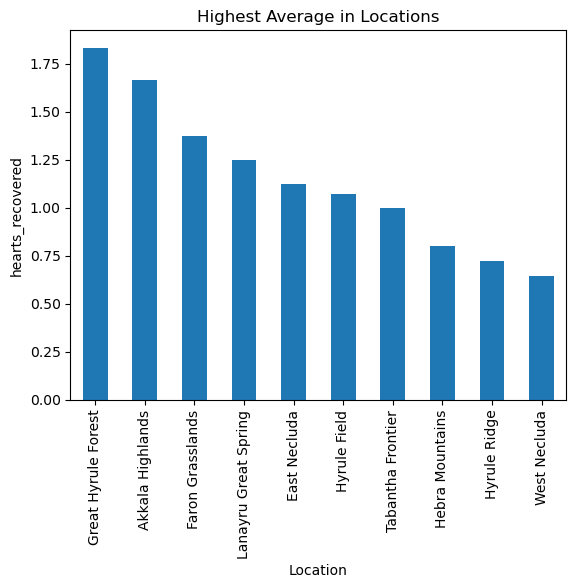

In [13]:
# this function will handle requiring user inputs to help user navigate through different analyitic outputs

def main_user_relations():
    
    print("="*100)
    
    print("Hello, welcome to my Project! Please type one of the following to navigate further in:")
    print("1: To deal with Weapons")
    print("2: To deal with Food")
    print("3: To deal with Materials")
    
    usr_input=0
    while (usr_input==0):
        usr_input = int(input("Please input your number here: "))
        
        # dealing with weapons
        if usr_input == 1:
            print("="*100)
            print("Hello, please select one of the following options:")
            print("1: Find the strongest weapon in BOTW")
            print("2: Find the strongest shield in BOTW")
            print("3: Compare two random weapons in BOTW")
            print("4: Find the highest variety of weapons in locations in BOTW")
            print("5: Find the average damage of weapons in locations in BOTW")
            print("6: Find the average defense of weapons in locations in BOTW")
            usr_input = 0
            while usr_input == 0:
                usr_input = int(input("Please input your number here: "))
                if usr_input == 1:
                    stored = df_to_weap_list(equip_df[equip_df["defense"]==0])
                    the_weapon = stored[0].compare_many(stored)
                    print(f"Great! The strongest weapon is {the_weapon.give_name()}, with a damage stat of {the_weapon.give_damage()}")
                elif usr_input == 2:
                    stored = df_to_weap_list(equip_df[equip_df["damage"]==0])
                    the_weapon = stored[0].compare_many(stored)
                    print(f"Great! The strongest shield is {the_weapon.give_name()}, with a defense stat of {the_weapon.give_defense()}")    
                elif usr_input == 3:
                    # working on code
                    print(2)
                elif usr_input == 4:
                    graph_locations_compare(locations_compare(equip_df[equip_df["defense"]==0]), "Weapons")
                    # debating whether to go into more deail about actual results or if just displaying the graph is enough    
                elif usr_input == 5:
                    average_dam_loc(equip_df[(equip_df["defense"]==0)],"damage")
                elif usr_input == 6:
                    average_dam_loc(equip_df[(equip_df["damage"]==0)],"defense")
                else:
                    print("That's not a valid answer! Please try again.")
                    usr_input=0
                
        # dealing with food
        elif usr_input == 2:
            print("="*100)
            print("Hello, please select one of the following options:")
            print("1: Find the most healing food in BOTW")
            print("2: Get Information about a random food in BOTW")
            print("3: View all food items for a given buff")
            print("4: Find the highest variety of food in locations in BOTW")
            print("5: Find the average healing of food in locations in BOTW")
            usr_input = 0
            while usr_input == 0:
                usr_input = int(input("Please input your number here: "))
                if usr_input == 1:
                    stored = df_to_food_list(food_df)
                    the_food = stored[0].compare_many(stored)
                    the_food.give_info()
                elif usr_input == 2:
                    # working on code
                    print(2)
                elif usr_input == 3:
                    # make a list of all buffs
                    # print out list, have user type in directly the food effect
                    # print out all food items that have that effect, give_info()
                    print(3)
                elif usr_input == 4:
                    graph_locations_compare(locations_compare(food_df), "Unique Food Items")
                elif usr_input == 5:
                    average_dam_loc(food_df,"hearts_recovered")
                else:
                    print("That's not a valid answer! Please try again.")
                    usr_input=0
            
        # dealing with materials
        elif usr_input == 3:
            print("="*100)
            print("Hello, please select one of the following options:")
            print("1: Find the most healing material in BOTW")
            print("2: Get Information about a random material in BOTW")
            print("3: View all material items for a given buff")
            print("4: Find the highest variety of material in locations in BOTW")
            print("5: Find the average healing of material in locations in BOTW")
            usr_input = 0
            while usr_input == 0:
                usr_input = int(input("Please input your number here: "))
                if usr_input == 1:
                    stored = df_to_food_list(materials_df)
                    the_food = stored[0].compare_many(stored)
                    the_food.give_info()
                elif usr_input == 2:
                    # working on code
                    print(2)
                elif usr_input == 3:
                    # make a list of all buffs
                    # print out list, have user type in directly the food effect
                    # print out all food items that have that effect, give_info()
                    print(3)
                elif usr_input == 4:
                    graph_locations_compare(locations_compare(materials_df), "Unique Food Items")
                elif usr_input == 5:
                    average_dam_loc(materials_df,"hearts_recovered")
                else:
                    print("That's not a valid answer! Please try again.")
                    usr_input=0
        
        else:
            print("That's not a valid answer! Please try again.")
            usr_input=0
                
    
    print("="*100)
    
main_user_relations()